# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [42]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
filtroColumnas<-weatherPraga[,c("DATE", "PRCP")]
head(filtroColumnas[order(filtroColumnas$PRCP, na.last = TRUE, decreasing = TRUE),], 10)


,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [3]:
library("ggplot2")

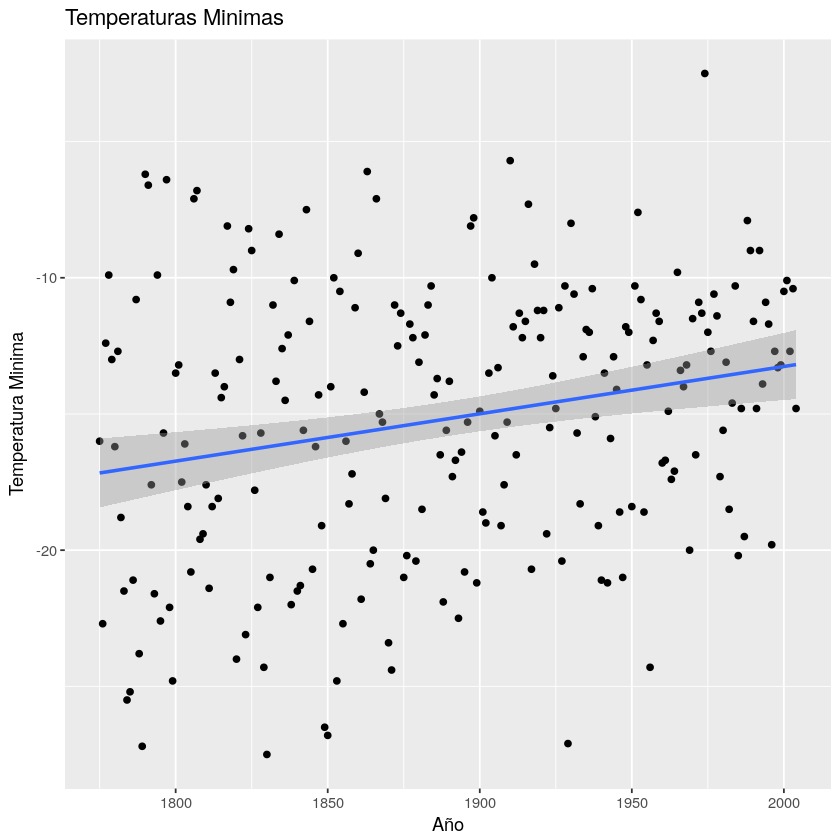

In [4]:
ggplot(weatherPraga, aes(x=DATE, y=EMNT)) + geom_point() + ggtitle("Temperaturas Minimas") + xlab("Año") + ylab("Temperatura Minima") + geom_smooth(method=lm)

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [5]:
intervalo1<-subset(weatherPraga, DATE >= 1775 & DATE <=1794)
print(paste("La media de la temperatura minima entre 1775 y 1794 es: ", mean(intervalo1$EMNT)))
intervalo2<-subset(weatherPraga, DATE >= 1985 & DATE <=2004)
print(paste("La media de la temperatura minima entre 1985 y 2004 es: ", mean(intervalo2$EMNT))) 
print(paste("La varianza intervalo 1: ", var(intervalo1$EMNT)))
print(paste("La varianza intervalo 2: ", var(intervalo2$EMNT)))
resultado<-t.test(intervalo1$EMNT, intervalo2$EMNT)
resultado
print(paste("Con un valor de p-value por debajo de 0.5 podemos asumir que efectivamente e significativa la diferencia entre ambos"))

[1] "La media de la temperatura minima entre 1775 y 1794 es:  -16.935"
[1] "La media de la temperatura minima entre 1985 y 2004 es:  -13.04"
[1] "La varianza intervalo 1:  42.3866052631579"
[1] "La varianza intervalo 2:  12.5593684210526"



	Welch Two Sample t-test

data:  intervalo1$EMNT and intervalo2$EMNT
t = -2.3499, df = 29.351, p-value = 0.02571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2832043 -0.5067957
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


[1] "Con un valor de p-value por debajo de 0.5 podemos asumir que efectivamente e significativa la diferencia entre ambos"


## Datos banco mundial

Carga los datos del banco mundial

In [3]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [4]:
i <- sapply(databank, is.factor)
databank[i] <- lapply(databank[i], as.character)

In [6]:
paisMax<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE",c("Country.Name", "1970"))
head(paisMax[order(paisMax$"1970", na.last=TRUE, decreasing=TRUE),], 1)


,Country.Name,1970
20599,World,27660218


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [7]:
cincoPaises<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE",c("Country.Name", "2012"))
head(cincoPaises[order(cincoPaises$"2012", na.last=TRUE, decreasing=TRUE),], 5)

,Country.Name,2012
20599,World,53526303
8119,IDA & IBRD total,35371310
11079,Low & middle income,34870956
12359,Middle income,31810392
8039,IBRD only,29153052


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [57]:
paisChina<-databank[databank$Country.Name == "China" & databank$Indicator.Code =="EN.ATM.GHGT.KT.CE",c(1,45:57)]
columnaAnio<-melt(paisChina, na.rm=TRUE)
columnaAnio$variable<-as.character(columnaAnio$variable)
head(columnaAnio)
#columnaAnio$ratio<-columnaAnio[NA,2:nrow(columnaAnio),3/1:length(columnaAnio),3]


Using Country.Name as id variables


Country.Name,variable,value
China,2000,5082326
China,2001,5145522
China,2002,5474915
China,2003,6226962
China,2004,7116642
China,2005,7803536


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

Using Country.Name as id variables


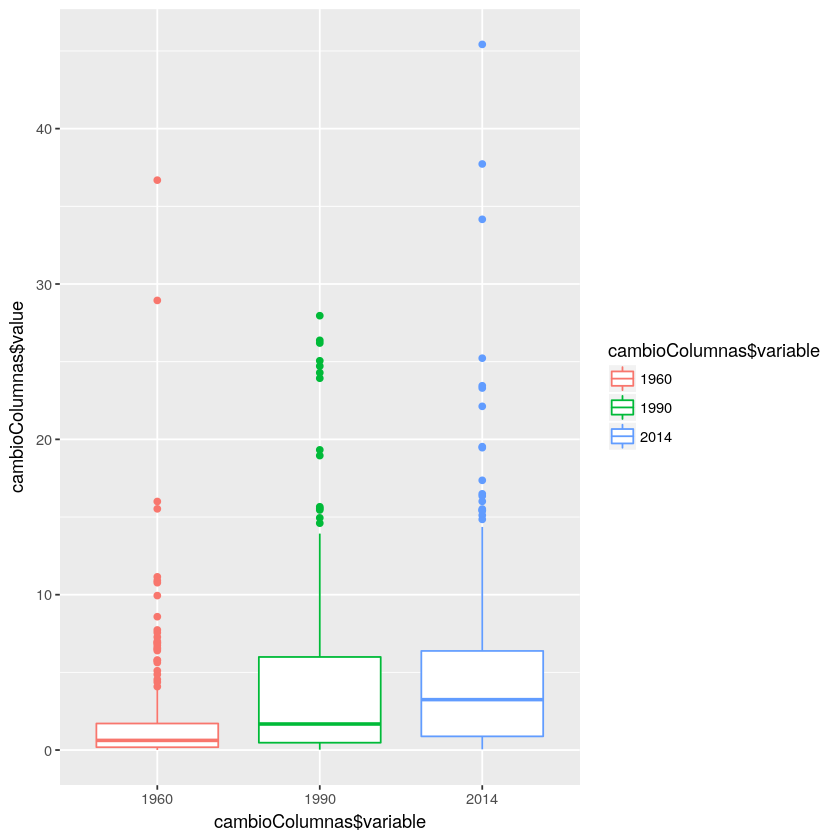

In [6]:
library(reshape2)
emisiones<-databank[databank$Indicator.Code =="EN.ATM.CO2E.PC",c(1,5,35,59)]
cambioColumnas<-melt(emisiones, na.rm=TRUE)
library(ggplot2)
ggplot(data=cambioColumnas,aes(x=cambioColumnas$variable,y=cambioColumnas$value,color=cambioColumnas$variable))+geom_boxplot()

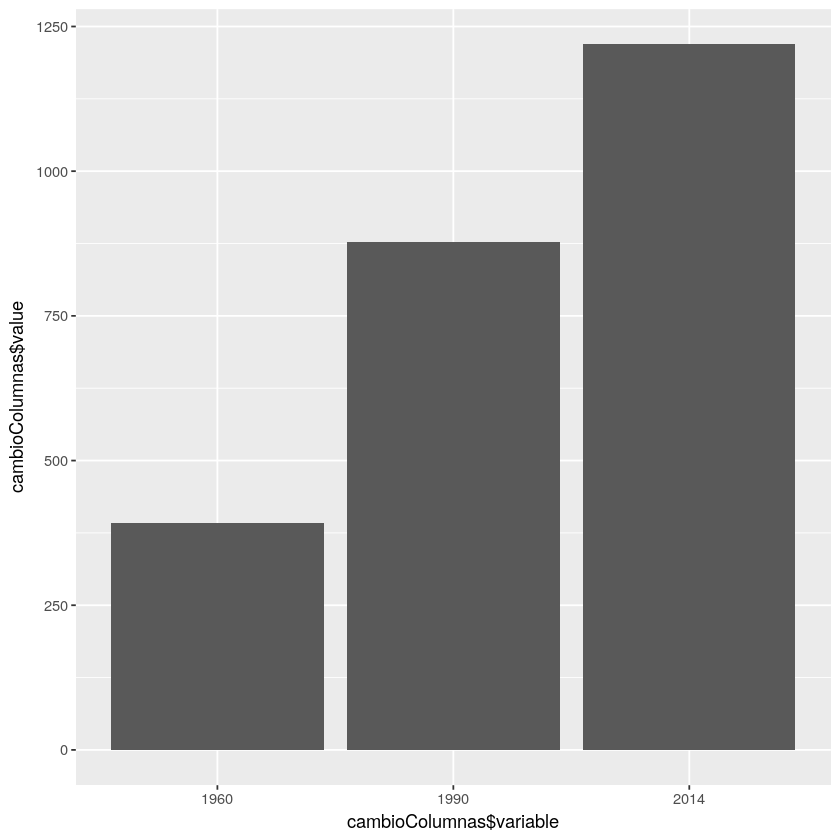

In [9]:
ggplot(data=cambioColumnas,aes(x=cambioColumnas$variable,y=cambioColumnas$value))+geom_col()

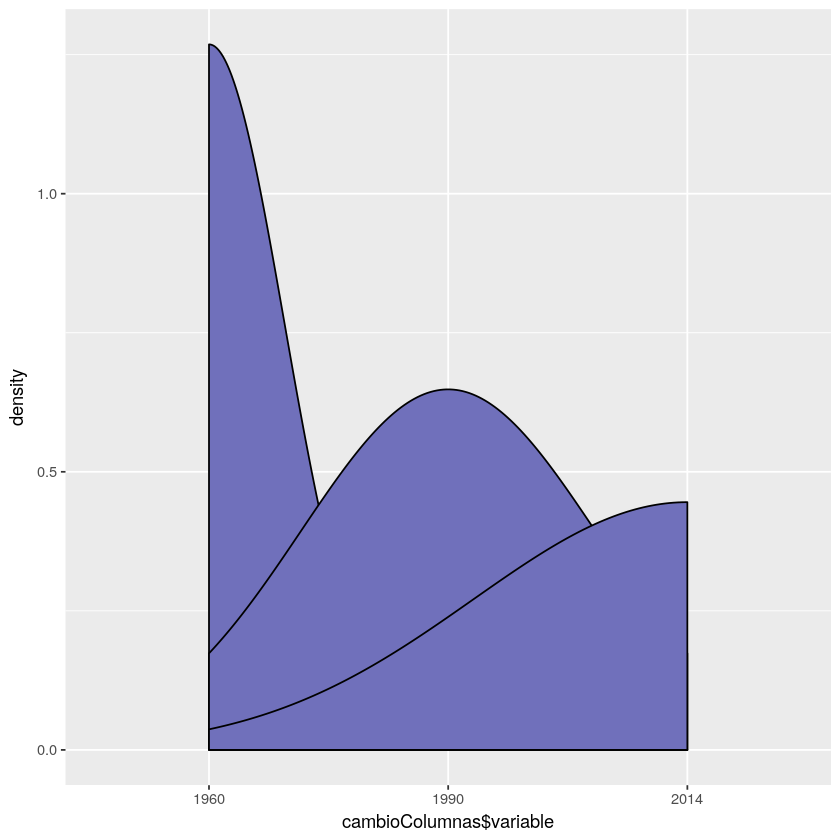

In [10]:
ggplot(data=cambioColumnas,aes(x=cambioColumnas$variable))+geom_density(fill="#7070BB")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Using Country.Name, Country.Code as id variables


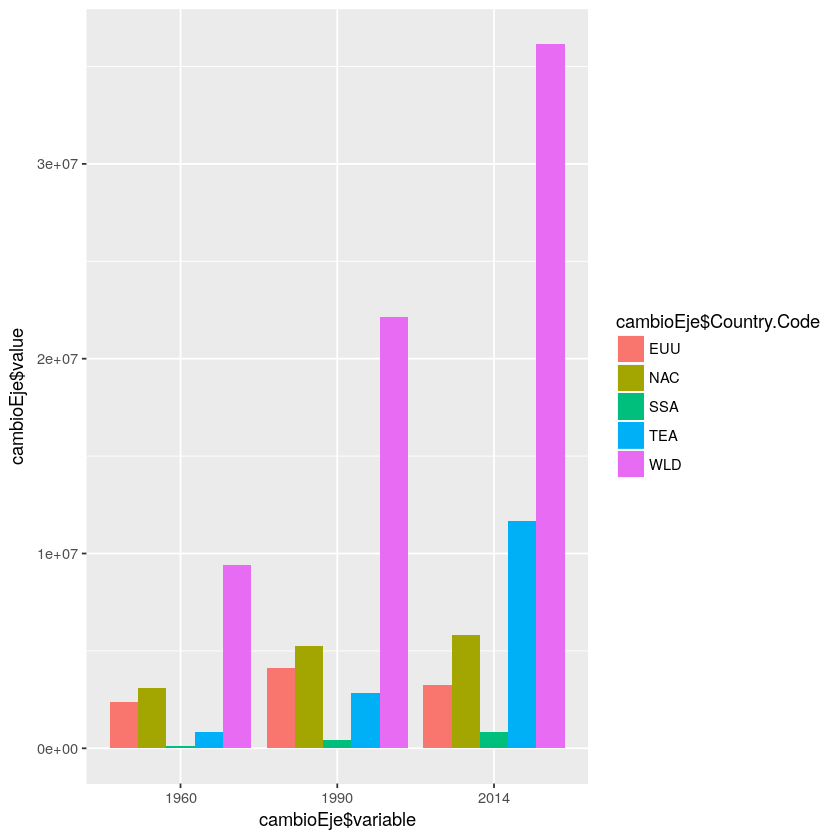

In [11]:
filtroEmisiones<-databank[databank$Indicator.Code =="EN.ATM.CO2E.KT",c(1,2,5,35,59)] 
filtroRegiones<-filtroEmisiones[filtroEmisiones$Country.Code=="WLD" | filtroEmisiones$Country.Code=="EUU" | filtroEmisiones$Country.Code=="SSA" | filtroEmisiones$Country.Code=="NAC" | filtroEmisiones$Country.Code=="TEA",]
cambioEje<-melt(filtroRegiones, na.rm=TRUE)
cambioEje$variable<-as.character(cambioEje$variable)
ggplot(data=cambioEje, aes(x=cambioEje$variable,y=cambioEje$value,fill=cambioEje$Country.Code)) + geom_bar(stat="identity",position="dodge")

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

Using Country.Code, Indicator.Code as id variables



Call:
lm(formula = value ~ poly(variable, 1), data = anioFila)

Residuals:
     Min       1Q   Median       3Q      Max 
-2645119  -799907   -95503  1108298  2964241 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       21348296     197474  108.11   <2e-16 ***
poly(variable, 1) 52546250    1464504   35.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1465000 on 53 degrees of freedom
Multiple R-squared:  0.9605,	Adjusted R-squared:  0.9597 
F-statistic:  1287 on 1 and 53 DF,  p-value: < 2.2e-16


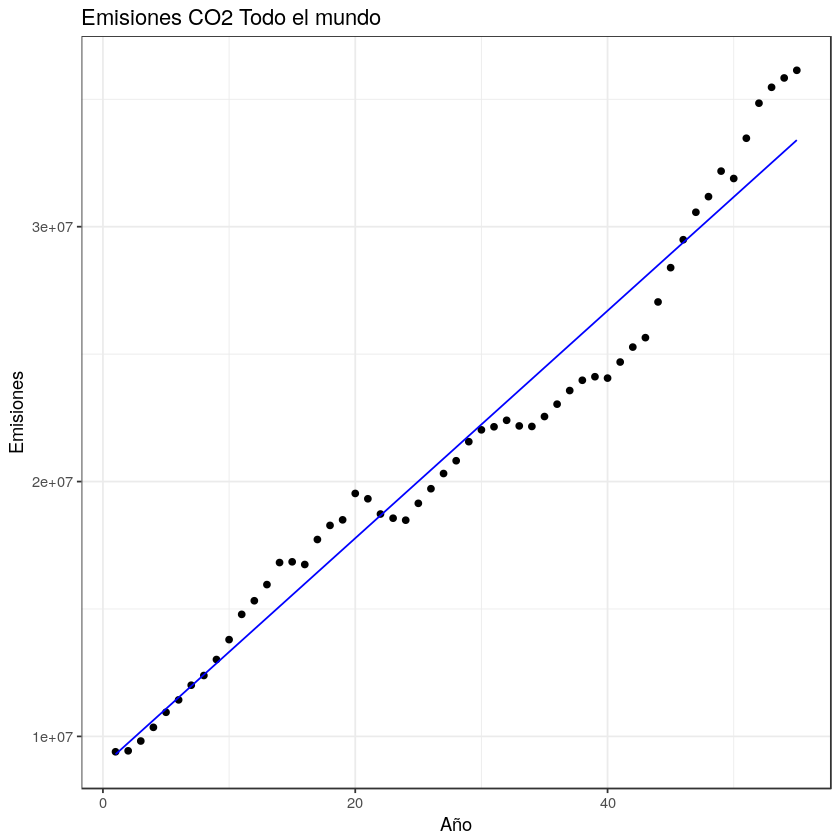

In [54]:
totalEmisiones<-databank[databank$Indicator.Code =="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD",c(2,5:ncol(databank)-1)] 
anioFila<-melt(totalEmisiones, na.rm=TRUE)
anioFila$variable<-as.integer(anioFila$variable)
#anioFila$indice<-1:nrow(anioFila)
model<-lm(data=anioFila,value~poly(variable,1))
summary(model)
anioFila$predicted<-predict(model,anioFila)
ggplot(data=anioFila,aes(x=variable))+
    geom_point(aes(y=value))+
    geom_line(aes(y=predicted),color="blue")+
    theme_bw()+xlab("Año")+ylab("Emisiones")+ggtitle("Emisiones CO2 Todo el mundo Polinomio 1")


Call:
lm(formula = value ~ poly(variable, 3), data = anioFila)

Residuals:
     Min       1Q   Median       3Q      Max 
-1298957  -443982   -59070   553478  1256113 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        21348296      89112 239.566  < 2e-16 ***
poly(variable, 3)1 52546250     660874  79.510  < 2e-16 ***
poly(variable, 3)2  5045948     660874   7.635 5.42e-10 ***
poly(variable, 3)3  8120147     660874  12.287  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 660900 on 51 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9918 
F-statistic:  2177 on 3 and 51 DF,  p-value: < 2.2e-16


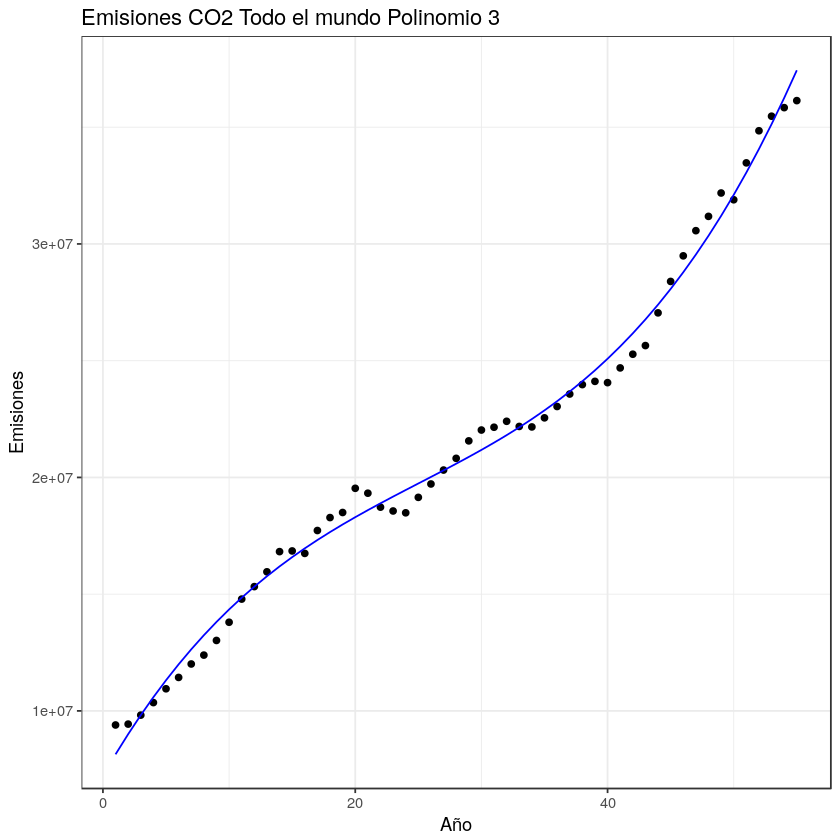

In [56]:
model3<-lm(data=anioFila,value~poly(variable,3))
summary(model3)
anioFila$predicted3<-predict(model3,anioFila)
ggplot(data=anioFila,aes(x=variable))+
    geom_point(aes(y=value))+
    geom_line(aes(y=predicted3),color="blue")+
    theme_bw()+xlab("Año")+ylab("Emisiones")+ggtitle("Emisiones CO2 Todo el mundo Polinomio 3")


Call:
lm(formula = value ~ poly(variable, 10), data = anioFila)

Residuals:
     Min       1Q   Median       3Q      Max 
-1168729  -212183    13071   258291  1076872 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          21348296      60523 352.731  < 2e-16 ***
poly(variable, 10)1  52546250     448850 117.069  < 2e-16 ***
poly(variable, 10)2   5045948     448850  11.242 1.60e-14 ***
poly(variable, 10)3   8120147     448850  18.091  < 2e-16 ***
poly(variable, 10)4    471522     448850   1.051 0.299218    
poly(variable, 10)5  -2777091     448850  -6.187 1.79e-07 ***
poly(variable, 10)6   -546964     448850  -1.219 0.229493    
poly(variable, 10)7  -1621835     448850  -3.613 0.000772 ***
poly(variable, 10)8     -6148     448850  -0.014 0.989133    
poly(variable, 10)9   1590757     448850   3.544 0.000948 ***
poly(variable, 10)10   123819     448850   0.276 0.783948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resi

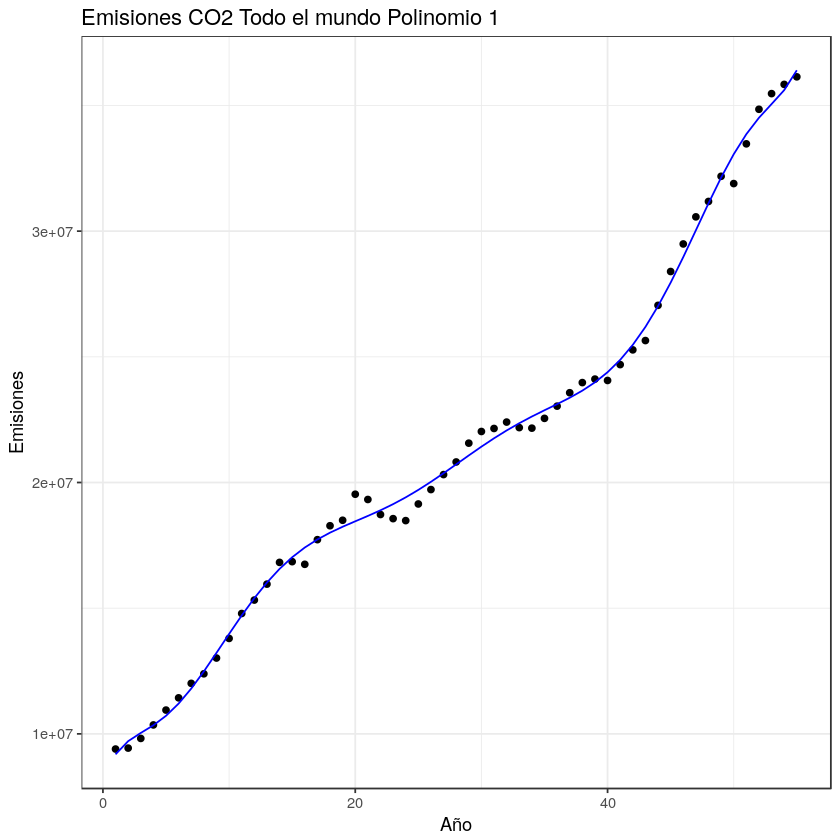

In [57]:
model10<-lm(data=anioFila,value~poly(variable,10))
summary(model10)
anioFila$predicted10<-predict(model10,anioFila)
ggplot(data=anioFila,aes(x=variable))+
    geom_point(aes(y=value))+
    geom_line(aes(y=predicted10),color="blue")+
    theme_bw()+xlab("Año")+ylab("Emisiones")+ggtitle("Emisiones CO2 Todo el mundo Polinomio 1")

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [1]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [30]:
aggdata <-aggregate(co2ppm, by=list(co2ppm$year), FUN=mean, na.rm=TRUE)
totalEmisiones<-databank[databank$Indicator.Code =="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD",c(2,5:ncol(databank)-1)] 
anioFila<-melt(totalEmisiones, na.rm=TRUE)
anioFila$variable<-as.character(anioFila$variable)
colnames(anioFila)[3]<-"year"
juntarDataframes<-merge(anioFila,aggdata, by="year")

Using Country.Code, Indicator.Code as id variables


[1] "La correlación de las variables interpolated y EN.ATM.CO2E.KT es: 0.98"

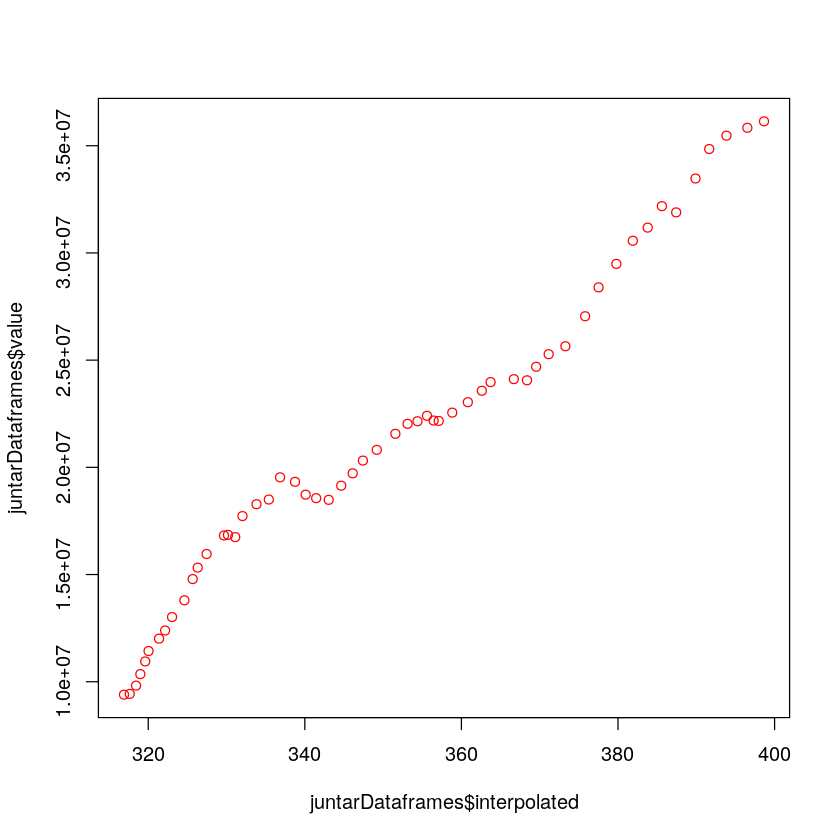

In [31]:
plot(juntarDataframes$interpolated,juntarDataframes$value,col="red")
cr<-cor(juntarDataframes$interpolated,juntarDataframes$value)
paste("La correlación de las variables interpolated y EN.ATM.CO2E.KT es:",round(cr,2))

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [49]:
matrizC<-juntarDataframes[,c("year","interpolated","value")]
colnames(weatherPraga)[2]<-"year"
dPraga<-weatherPraga[,c("year","EMNT")]
juntarTodos<-merge(matrizC,dPraga, by="year")
cor(juntarTodos[2:ncol(juntarTodos)], use="complete.obs")

,interpolated,value,EMNT
interpolated,1.0000000,0.9703198,0.1783153
value,0.9703198,1.0000000,0.2254552
EMNT,0.1783153,0.2254552,1.0000000
